# **KNN Algorithm:**

---



In [58]:
# Import modules
from sklearn.datasets import fetch_openml, load_digits
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import math

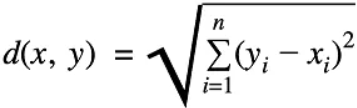

In [59]:
# Calculate Euclidean distance
def Euclidean_distance(row1, row2):
    distance = 0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
        return math.sqrt(distance)

In [60]:
# Get nearest neighbor
def Get_Neighbors(train, test_row, num):
 
    distance = list() # []
    data = []
    for i in train:
        dist = Euclidean_distance(test_row, i)
        distance.append(dist)
        data.append(i)
        distance = np.array(distance)
        data = np.array(data)
        # Finding the index in ascending order
        index_dist = distance.argsort()
        # Arranging data according to index
        data = data[index_dist]
        # slicing k value from number of data
        neighbors = data[:num]
        return neighbors

In [61]:
# Predicting the category
def predict_classification(train, test_row, num):
    Neighbors = Get_Neighbors(train, test_row, num)
    Classes = []
    for i in Neighbors:
        Classes.append(i[-1])
        prediction = max(Classes, key= Classes.count)
        return prediction

In [68]:
# Check the accuracy of the data set
def accuracy(y_true, y_pred):
    n_correct = 0
    if y_true.any() == y_pred.any():
      n_correct += 1
      acc = n_correct/len(y_true)
      return acc

In [69]:
# load data set. i.e., load_digits()
mnist = fetch_openml("mnist_784")

**Pre-Processing data set:**

In [70]:
# Checking the column names and preprocessing target values in standard format
mnist.keys()
mnist.target = mnist.target.astype(np.int8)
# Determining independent and dependent variable and finding the shape
x = np.array(mnist.data)
y = np.array(mnist.target)
x.shape, y.shape
# output for above x.shape, y.shape -> ((70000, 784), (70000,))
# shuffling the values of x and y
si = np.random.permutation(x.shape[0])
x = x[si]
y = y[si]

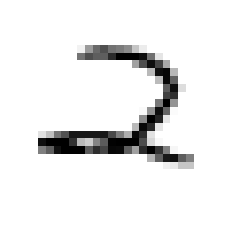

In [7]:
some_digit = x[12]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary)
plt.axis("off")
plt.show()

**Prediction of the model:**

In [71]:
#slicing data
train_x = x[:2000]
train_y = y[:2000]
# Inserting train_y in train_x
train = np.insert(train_x, 784, train_y, axis = 1)
prediction = predict_classification(train, train[1244], 4)
prediction

7.0

In [66]:
train[1244][-1]

7.0

**Visualization:**

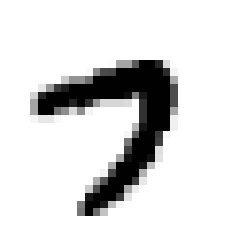

In [67]:
#Plotting the output
some_digit = train[1244][:-1]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary)
plt.axis("off")
plt.show()

**Accuracy:**

In [53]:
# Output 0.929 (i.e., 92%)
accuracy(train, prediction)

0.92999